In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("titanic_toy.csv")

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [8]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [9]:

df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
X_train["Age_99"] = X["Age"].fillna(99)
X_train["Age_minus1"] = X["Age"].fillna(-1)

X_train["Fare_99"] = X["Fare"].fillna(99)
X_train["Fare_minus1"] = X["Fare"].fillna(-1)

In [17]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_minus_1,Fare_99,Fare_minus_1,Age_minus1,Fare_minus1
674,NaN,0.0000,0,99.0,-1.0,0.0000,0.0000,-1.0,0.0000
349,42.0,8.6625,0,42.0,42.0,8.6625,8.6625,42.0,8.6625
351,NaN,35.0000,0,99.0,-1.0,35.0000,35.0000,-1.0,35.0000
348,3.0,15.9000,2,3.0,3.0,15.9000,15.9000,3.0,15.9000
117,29.0,21.0000,1,29.0,29.0,21.0000,21.0000,29.0,21.0000


In [16]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_99'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 wala imputation:  2536.0773428319685
Fare Variance after -1 wala imputation:  2378.5676784883503


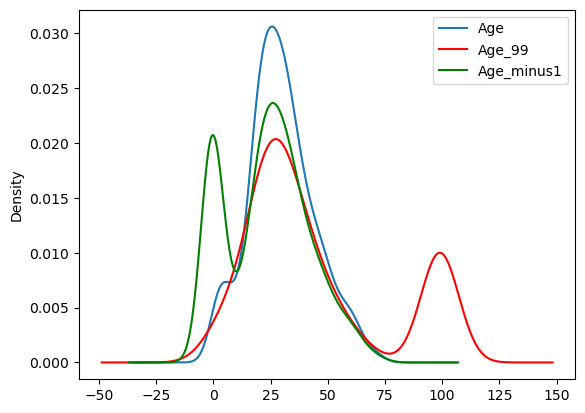

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

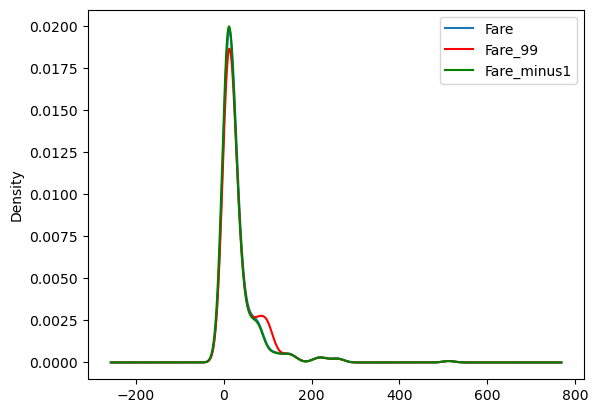

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [24]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus_1,Fare_99,Fare_minus_1,Age_minus1,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585,1.000000,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000,0.142022,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233,-0.140668,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687,-0.344476,-0.062687
Age_minus_1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514,1.000000,0.131514
Fare_99,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648,0.143284,0.902648
Fare_minus_1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000,0.131514,1.000000
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514,1.000000,0.131514
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000,0.131514,1.000000


In [25]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus_1,Fare_99,Fare_minus_1,Age_minus1,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188,204.349513,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914,125.558364,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989,-4.149246,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400,-189.535540,-94.317400
Age_minus_1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141,318.089620,114.394141
Fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409,128.692715,2216.958409
Fare_minus_1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678,114.394141,2378.567678
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141,318.089620,114.394141
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678,114.394141,2378.567678


# Using sklear

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [27]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')


In [28]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [29]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [30]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [31]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [32]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])